<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/inprov_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:

#Preprocessing
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df.Age.fillna(df.Age.mean(), inplace=True)
df.Embarked.fillna('S', inplace=True)

df.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
columns=['Sex','Embarked']
df[columns]=df[columns].apply(lambda x:le.fit_transform(x))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=y, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

akurasi=accuracy_score(y_test,y_pred)
presisi=accuracy_score(y_test,y_pred)
recall=accuracy_score(y_test,y_pred)
print(f"Hasil Model\n akurasi :{akurasi}, presisi :{presisi}, recall:{recall}")

Hasil Model
 akurasi :0.7150837988826816, presisi :0.7150837988826816, recall:0.7150837988826816


In [13]:
#Improvement Model - Fiture Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scl=MinMaxScaler()
scl.fit(x_train)
x_train_scl=scl.transform(x_train)
x_test_scl=scl.transform(x_test)
x_train_scl

array([[0.        , 1.        , 0.56647399, ..., 0.        , 0.0556283 ,
        1.        ],
       [0.5       , 1.        , 0.28373963, ..., 0.        , 0.02537431,
        1.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [1.        , 1.        , 0.50992712, ..., 0.        , 0.02753757,
        1.        ],
       [0.        , 0.        , 0.17064589, ..., 0.33333333, 0.2342244 ,
        1.        ],
       [0.        , 1.        , 0.25860769, ..., 0.16666667, 0.15085515,
        1.        ]])

In [14]:
knn= KNeighborsClassifier()
knn.fit(x_train_scl,y_train)
y_pred=knn.predict(x_test_scl)

akurasi=accuracy_score(y_test,y_pred)
presisi=accuracy_score(y_test,y_pred)
recall=accuracy_score(y_test,y_pred)
print(f"Hasil Model\n akurasi :{akurasi}, presisi :{presisi}, recall:{recall}")

Hasil Model
 akurasi :0.8100558659217877, presisi :0.8100558659217877, recall:0.8100558659217877


In [27]:
#Improvement model - Tuning Parameter K
n=range(1,100,2)
train_score,test_score=[],[]
for k in n:
  knn= KNeighborsClassifier(n_neighbors=k,p=1)
  knn.fit(x_train_scl,y_train)
  train_score.append(knn.score(x_train_scl,y_train))
  test_score.append(knn.score(x_test_scl,y_test))

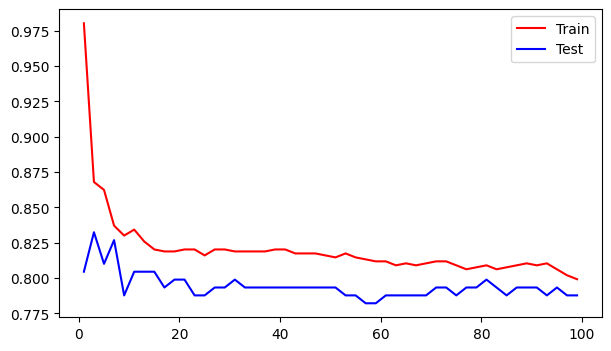

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(n,train_score, label='Train',c='r')
plt.plot(n,test_score, label='Test',c='b')
plt.legend()
plt.show()

In [29]:
max(test_score)

0.8324022346368715

In [30]:
import numpy as np

k_best=np.argmax(test_score)+1
k_best

2